## 1. Free fall
This code works by using eulers method. The limits make sense (V_t should be g/a, and it is). The results change as expected

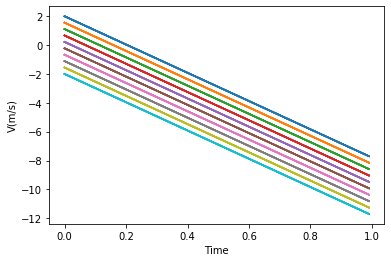

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# def function of both x and its derivitive
def accel(fx):
    g= 9.8
    a = 0
    return -g-a*fx
#deriv takes funciton as input
def euler(x0,f0,xi,xf,dx,deriv):    
    #define 2 arrays: store x and y values
    x = np.array([x0])
    y = np.array([f0])
    i = x0-dx
    while i >xi:
        xval = np.array([i]) #incrment x
        x = np.concatenate((x,xval)) #add to arrat
        dfdx = deriv(y[-1]) #derv evaluated
        yval = y[-1]-dfdx*dx #incrment y
        yval = np.array([yval])
        y = np.concatenate((y,yval))
        i = i-dx
    i = x0+dx
    #flip to put lowest values first
    x=np.flip(x)
    y=np.flip(y)
    #repeat but forward
    while i<xf:
        xval = np.array([i])
        x = np.concatenate((x,xval))
        dfdx = deriv(y[-1])
        yval = y[-1]+dfdx*dx
        yval = np.array([yval])
        y = np.concatenate((y,yval))
        i = i+dx
    return(x,y)
# break down region into peices, and plot along piece of region
NIC = 10
IC = np.linspace(-2, 2, NIC)
plt.xlabel("Time")
plt.ylabel("V(m/s)")
for i in range(NIC):
    x,y = euler(0,IC,0,1,.01,accel)    
    plt.plot(x, y)


## 2. Basic Decay with variable lamda

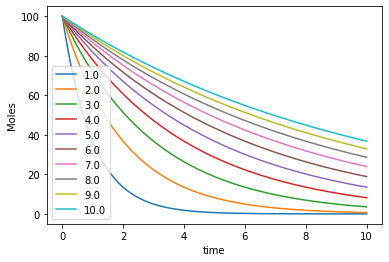

In [2]:
# create basic funcitons
def decay(fx,l):
    return (-1/l)*fx
#deriv takes 2 inputs, x and function of x
def euler(x0,f0,xi,xf,dx,deriv,l):    
    #define 2 arrays: store x and y values
    x = np.array([x0])
    y = np.array([f0])
    i = x0+dx
    while i<xf:
        xval = np.array([i]) #inrement time
        x = np.concatenate((x,xval)) #add time to counter
        dfdx = deriv(y[-1],l)#derive incrment
        yval = y[-1]+dfdx*dx #incrment y
        yval = np.array([yval])
        y = np.concatenate((y,yval)) #add y to array
        i = i+dx
    return(x,y)
# create seperate lamda values to graoph
NIC = 10
lam = np.linspace(1, 10, NIC)
for i in range(NIC):
    x,y = euler(0,100,0,10,.001,decay,lam[i])    
    plt.plot(x, y, label = lam[i])
    plt.xlabel("time")
    plt.ylabel("Moles")
    plt.legend()

## 3&4 these are very similar problems. 3 is a simplified version of 4.
for a stable dcayer, remove one of the positive terms from a or b pop

' \nfor stable decayer, remove positve term from one of the functions(apop or bpop)\n'

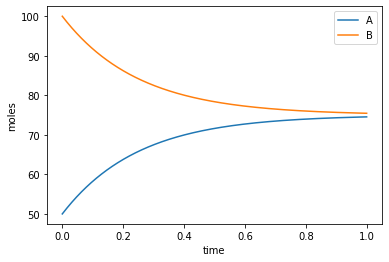

In [3]:
#formula is decay of self plus add of other
def bpop(popa,la,lb,popb):
    return 1*(1/lb)*popa-popb/la
def apop(popa,la,lb,popb):
    return 1*(1/la)*popb-popa/lb
#deriv takes 2 inputs, x and function of x
def euler(t0,apopi,bpopi,tf,dt,ader,bder,lama,lamb):    
    #define 3 arrays: store x and y values
    t = np.array([t0])
    ya = np.array([apopi])
    yb = np.array([bpopi])
    i = t0+dt
    while i<tf:
        #first deal with time
        tval = np.array([i])
        t = np.concatenate((t,tval))
        #then increment apop
        dadt = ader(ya[-1],lama,lamb,yb[-1]) #derive
        yaval = ya[-1]+dadt*dt #make new a val
        yaval = np.array([yaval])
        ya = np.concatenate((ya,yaval)) #incrment
        #then icrement bpop
        dbdt = bder(ya[-2],lama,lamb,yb[-1]) #use -2 because already incrmented
        ybval = yb[-1]+dbdt*dt
        ybval = np.array([ybval])
        yb = np.concatenate((yb,ybval))
        i = i+dt
    return(t,ya,yb)
t,ya,yb = euler(0,50,100,1,.001,apop,bpop,.5,.5)
plt.plot(t, ya, label = "A")
plt.plot(t,yb, label = 'B')
plt.xlabel('time')
plt.ylabel('moles')
plt.legend()
